In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize

import pandas as pd
import numpy as np
from numpy import linalg as LA
import math
import matplotlib.pyplot as plt

Raw_Data = pd.read_csv('vehicles-processed-2.csv')


# Raw_Data_temp = Raw_Data.drop(columns=['make','model','VClass','gears'])
Raw_Data_temp = Raw_Data.drop(columns=['make','model'])
display(Raw_Data_temp)
# Raw_Data_temp = np.array(Raw_Data_temp)


# np.random.shuffle(Raw_Data_temp)
X = np.array(Raw_Data_temp.drop(columns=['comb08'])).copy()
Y = np.array(Raw_Data_temp['comb08']).copy()


# for i in range(len(X[1])):
#   X[:,i] = X[:,i] / np.linalg.norm(X[:,i])

# X_Train = X[:int(len(X)*0.66)]
# X_Test = X[int(len(X)*0.66):]

# Y_Train = Y[:int(len(X)*0.66)]
# Y_Test = Y[int(len(X)*0.66):]

,VClass,comb08,cylinders,displ,drive,year,sCharger,tCharger,gearbox,gears
0,3,21,4,2.0,0,1984,0,0,0,5
1,3,22,4,1.5,0,1984,0,0,0,5
2,3,15,8,5.7,0,1984,0,0,1,4
3,3,15,8,5.7,0,1984,0,0,0,4
4,3,17,6,3.0,0,1984,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...
26443,10,21,6,3.6,4,2024,0,0,1,8
26444,10,17,8,5.3,4,2024,0,0,1,10
26445,10,16,8,5.3,4,2024,0,0,1,10
26446,10,17,6,4.0,4,2024,0,0,1,5


In [169]:
# reg = LinearRegression().fit(X_Train, Y_Train)
# Y_predict = reg.predict(X_Train)

# Titles = Raw_Data.drop(columns=['comb08','make','model','VClass','gears']).columns.tolist()
# Coefficient = pd.DataFrame(reg.coef_).T
# Coefficient.columns=Titles
# display(Coefficient)

# from sklearn.metrics import mean_squared_error
# print(mean_squared_error(Y_Train, Y_predict))

# print("\n\n")
# for i in range(10):
#   X_Value = pd.DataFrame(X_Train[i],Titles).T
#   display(X_Value)
#   print("True_Value: ",round(Y_Train[i],2),"Predicted_Value: ",round(Y_predict[i],2))
#   print()

,VClass,cylinders,displ,drive,year,sCharger,tCharger,gearbox,gears
0,-66.634547,-44.889645,-1422.443309,-292.600596,6.288144e+11,-2.134175e+08,-161.88633,-228.755846,-51.111645


0.06709754949522455 0.025

[25.28937149] 29 

Training Started: 

[3.000e+00 4.000e+00 1.900e+00 2.000e+00 1.986e+03 0.000e+00 0.000e+00
 0.000e+00 5.000e+00] 
 [786698.27025867] 
 26 
 2757


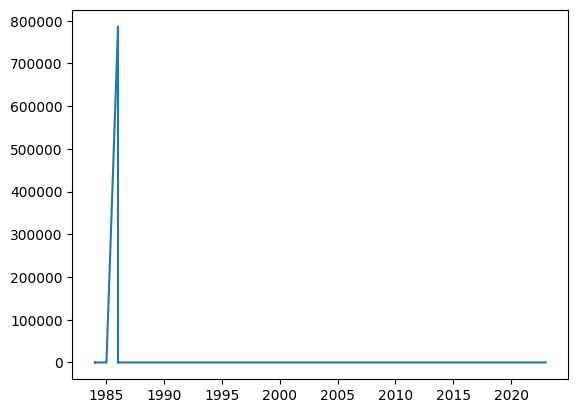

In [170]:
epsilon = 0.1
delta = 0.1

X_Size = 1000

# np.random.shuffle(Raw_Data_temp)
X = np.array(Raw_Data_temp.drop(columns=['comb08'])).copy()
Years = np.array(Raw_Data_temp['year']).copy()
Y = np.array(Raw_Data_temp['comb08']).copy()

X_origin = np.array(Raw_Data_temp.drop(columns=['comb08'])).copy()


X_Train2_Years = Years[X_Size:-1].copy()



for i in range(len(X[1])):
  X[:,i] = X[:,i] / np.linalg.norm(X[:,i])



X_Train = X[:X_Size].copy()
X_Train2 = X[X_Size:-1].copy()
X_origin = X_origin[X_Size:-1].copy()

Y_Train = Y[:X_Size].copy()
Y_Train2 = Y[X_Size:-1].copy()

reg = LinearRegression().fit(X_Train, Y_Train)

Titles = Raw_Data.drop(columns=['comb08','make','model']).columns.tolist()
Coefficient = pd.DataFrame(reg.coef_).T
Coefficient.columns=Titles
display(Coefficient)


C = -7e3
Q = (epsilon**2)/(X_Size*np.sqrt(np.log(1/(epsilon*delta)))*np.log(X_Size))


alpha1 = C*Q*np.log(Q)
alpha2 = epsilon/4

print(alpha1,alpha2)
print()

print(reg.predict(X_Train2[0].reshape(1,-1)),Y_Train2[0],"\n")
print("Training Started: \n")


predict_error = []
predict_year = []
t = 0
counter = 0
while t<len(X_Train2):
  # print("\nt=",t)
  xt = X_Train2[t]

  U, S, Vh = LA.svd(np.matmul(X_Train.transpose(),X_Train), full_matrices=False)

  # q = X_Train2@U.getH()
  # q = q@LA.inv(S.getH())
  # q = q@U.getH().transpose()
  # q = q@xt

  q = xt@LA.pinv(X_Train.transpose()@X_Train)@X_Train.transpose()
  # print(np.shape(q))
  # print(xt-q@X_Train2)

  u = U.transpose()@xt

  # print("q=",LA.norm(q),alpha1,"u=",LA.norm(u),alpha2)
  # print(reg.predict(xt.reshape(1,-1))-Y_Train2[t])

  if(LA.norm(q)<= alpha1 and LA.norm(u)<= alpha2):


    Y_predict = reg.predict(xt.reshape(1,-1))
    predict_error.append(Y_predict-Y_Train2[t])
    predict_year.append(int(X_Train2_Years[t]))
    # print(Y_predict,Y_Train2[t],"\n")
    t+=1
    if(Y_predict-Y_Train2[t]>100):
      print(X_origin[t],'\n',Y_predict,'\n',Y_Train2[t],'\n',t+X_Size)


  else:
    Y_predict = "[Reject]"
    # print(Y_predict,Y_Train2[t],"\n")

    for i in range(20):
      try:
        yt = Y_Train2[t+i]
        X_Train = np.delete(X_Train, 0,  axis=0)
        Y_Train = np.delete(Y_Train, 0,  axis=0)

        X_Train = np.append(X_Train, xt.reshape(1,-1), axis=0)
        Y_Train = np.append(Y_Train, np.array([yt]), axis=0)
      except:
        break

    reg = LinearRegression().fit(X_Train, Y_Train)
    t+=i

  Titles = Raw_Data.drop(columns=['comb08','make','model']).columns.tolist()
  Coefficient = pd.DataFrame(reg.coef_).T
  Coefficient.columns=Titles

  # display(Coefficient)

  counter+=1

predict = [predict_year,predict_error]
plt.plot(predict_year,predict_error)


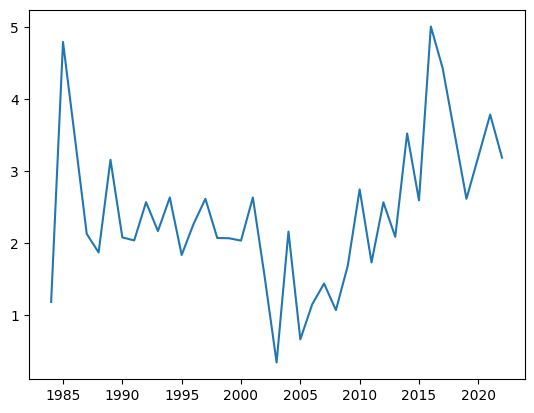

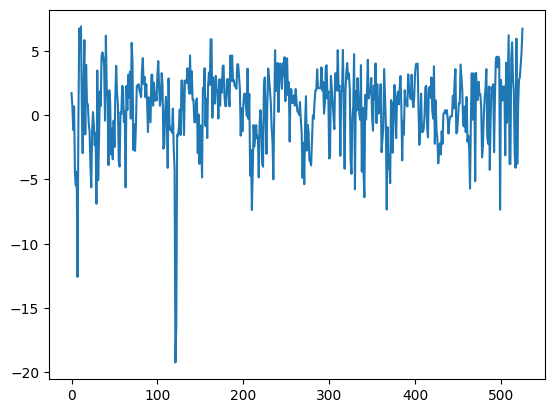

In [177]:


predict_year.pop(np.argmax(predict_error))
predict_error.pop(np.argmax(predict_error))


error_list = [[],[]]

error = 0
count = 0

for i in range(len(predict_error)-1):

  if(predict_year[i] == predict_year[i+1]):
    error+=np.abs(predict_error[i])
    count+=1
  else:
    try:
      error_list[1].append(float(error/count))
      error_list[0].append(int(predict_year[i]))
      error = 0
      count = 0
    except:
      error = 0
      count = 0


plt.plot(error_list[0],error_list[1])
# print(error_list[1])

plt.figure()
plt.plot(predict_error)

In [180]:
error_list = np.array(error_list)
error_list = error_list.transpose()
df = pd.DataFrame(error_list,columns = ['Year','error'])
display(df)
df.to_csv("Average_Error_By_Year.csv")

,Year,error
0,1984.0,1.185405
1,1985.0,4.792978
2,1986.0,3.466698
3,1987.0,2.129605
4,1988.0,1.872048
5,1989.0,3.157944
6,1990.0,2.080430
7,1991.0,2.039018
8,1992.0,2.569568
9,1993.0,2.168315


In [ ]:
from sklearn.decomposition import PCA
year = 1988
Raw_Data_temp = Raw_Data.drop(columns=['make','model'])
Raw = Raw_Data_temp.loc[(Raw_Data_temp['year']>=year) & (Raw_Data_temp['year']<=year+1)]

display(Raw)

Y_Train = np.array(Raw['comb08'])
X_Train = np.array(Raw.drop(columns = ['comb08']))

pca = PCA(n_components=2)
pca.fit(X_Train)
plt.scatter(X_Train.dot(pca.components_[0]), Y_Train, alpha=0.3)
plt.show()

plt.scatter(X_Train.dot(pca.components_[1]), Y_Train, alpha=0.3)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

class MPG:
    def __init__(self, file_path='vehicles-processed-2.csv', columns_to_drop=['make', 'model']):
        self.raw_data = pd.read_csv(file_path)
        self.clean_data = self.drop_columns(columns_to_drop)

        self.modified_data = {}

        self.mpg_col = 'comb08'

        self.trained_models = {}

    def drop_columns(self, columns_to_drop):
        tmpDF = self.raw_data.drop(columns=columns_to_drop, errors='ignore')
        return tmpDF

    def get_year_range(self, start_year, end_year=None):
        if end_year == None:
            end_year = start_year + 10
        result_data = self.clean_data[
            (self.clean_data['year'] >= start_year) & (self.clean_data['year'] <= end_year)].copy()
        # Update modified_data dictionary
        decade_key = f'{start_year}-{end_year}'
        self.modified_data[decade_key] = result_data

        return result_data

    def train_linear_regression(self, train_data, test_data, model=None):
        Y_Train = np.array(train_data[self.mpg_col])
        X_Train = np.array(train_data.drop(columns=[self.mpg_col]))

        Y_Test = np.array(test_data[self.mpg_col])
        X_Test = np.array(test_data.drop(columns=[self.mpg_col]))

        if model is None:
            # Create a new model if none is provided
            model = LinearRegression()
            print("Created new model")

        # Train or update the model
        model.fit(X_Train, Y_Train)
        Y_predict = model.predict(X_Test)

        mse = mean_squared_error(Y_Test, Y_predict)

        decade_key = f"{train_data['year'].min()}-{test_data['year'].max()}"
        self.trained_models[decade_key] = model

        return model, mse


# Example usage:
mpg = MPG()


mse = []
model = None
start_year = 1984
years = np.arange(start_year, 2024, 1)

for d in years:
    # model, tmp_mse = mpg.train_linear_regression(mpg.get_year_range(start_year,d+1), mpg.get_year_range(d+1,d+2))#,model)
    model, tmp_mse = mpg.train_linear_regression(mpg.get_year_range(d,d+1), mpg.get_year_range(d,d+1))#,model)
    mse.append(tmp_mse)

#print(mse)

# Plotting
plt.plot(years, mse, marker='o')
plt.title('MSE vs Year')
plt.xlabel('Year')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

# Print MSE values
for i in range(len(years)):
    print(f"MSE trained on {years[i]}: {mse[i]}")

In [ ]:
# print(np.shape(U))
# print(np.shape(S))
# print(np.shape(Vh))
# print(np.shape(np.matmul(X_Train2,X_Train2.transpose())))
# print(np.shape(np.matmul(np.matmul(U,np.diag(S)),Vh)))

# print(np.matmul(X_Train2,X_Train2.transpose()))
# print(np.matmul(np.matmul(U,np.diag(S)),Vh))

a = np.array([2,3]).transpose()
b = np.array([[1,0],[0,1]])
print(np.shape(a))
print(np.shape(b))

ans = np.matmul(b,a)
np.matrix(ans).getH()

print(b@a)
print(ans)

In [ ]:
# predict_error
# print(predict_error.index(max(predict_error)))
# print(max(predict_error))
# print(predict_error[530])

i = 530
print(X_Train2[i],Y_Train2[i])

i = 531
print(X_Train2[i],Y_Train2[i])
